# AIRBNB PROJECT

## Pipeline of Project

1. **Loading Data**

2. **Data Wrangling:** 

 - Deleting useless columns
 - Replace the missing values in reviews_per_month with the mean value
 - Remove the NaN values from the dataset
 
 
3. **Exploration,Visualization and Splitting of Data:**
    - Exploring the outliers
    - Plot the distribution of Neighbourhood Group with Price
    - Plot the distribution of Room Type with Price
    - Relation between Neighbourhood Group, Room Type and Price
    - Map (using Latitude and Longitude) of Availabity of room related with Price
    - Convertion of Price in log scale 
    - Encoding Neighbourhood Group, Room Type and Neighbourhood
    - Get correlation between different features (correlation matrix)
    - Split of data set and save them in two different files (test and train set)

## 1. Loading Data 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Used it for NYC image
import seaborn as sns

from scipy.stats import norm # Used for the log price 

In [2]:
# Loading the data with pandas and take a quick look
airbnb_df = pd.read_csv("./Data/data.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2. Data Wrangling

In [3]:
# To see the total amount of data(#rows) and the features (#columns)
airbnb_df.shape

(48895, 16)

In [4]:
# Just checking the data types of each feature for further usage 
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
# Checking whether there are duplicated rows, or not
airbnb_df.duplicated().sum()

0

In [6]:
# Cheking the missing values for each column
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Deleting the useless columns 

In order to make decisions about how to handle with missing data, one should check the total number of missing data. In this specific case, there is not any acceptable reason to keep last_review feature for further steps. On the contrary, reviews_per_month will be kept since it is important feature for the predictions. Thus, name, host_id and last_review will be dropped. Additionally, id feature also will be dropped due to lack of capacity to give useful knowledge about prediction.

In [7]:
# Dropped the non-related feature columns
airbnb_df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

### Replace the missing values in reviews_per_month with the mean value

Missing values will be replaced with mean of that feature. By doing that one can minimize the affect of replaced values to normalization process comparing to replace with just 0.

In [8]:
mean=airbnb_df['reviews_per_month'].mean()
airbnb_df['reviews_per_month'].fillna(mean, inplace=True)


In [9]:
# Checking again the missing values
airbnb_df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## 3. Exploration and Visualization of Data

### Exploring the outliers

In [10]:
# Let's see what host_id have the most listings on Airbnb platform 
# Printing only the top ten busiest hosts
top_host=airbnb_df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

Now in order to increase the prediction capabilities, one can drop the outlier data of the minimum_nights and price features.

<AxesSubplot:>

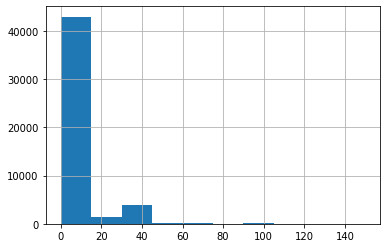

In [11]:
# Looking at the histogram to see the distribution of the data of the minimum_nights in range 0 to 150 nights.
airbnb_df['minimum_nights'].hist(range=(0,150))

In [12]:
# Since histogram states that the most of the data are distributed under 40 
airbnb_df = airbnb_df[airbnb_df["minimum_nights"]<40]

<AxesSubplot:>

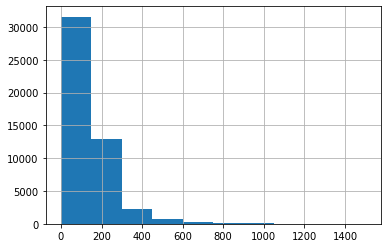

In [13]:
# Looking at the histogram to see the distribution of the data of the price in range 0 to 1500 dollars
airbnb_df['price'].hist(range=(0,1500))

In [14]:
# Since histogram states that the most of the data are distributed under 1000 
airbnb_df = airbnb_df[airbnb_df["price"]<1000]


### Plot the distribution of Neighbourhood Group with Price and Room Type with Price


In order to get better interpretation of price with features, one can examine the data distribution of price for each neighbourhood_group and for each room_type. 


A violinplot shows the distribution of quantitative data across several levels of one (or more) categorical variables (the unique values, in our case) such that those distributions can be compared. 


In [15]:
# First of all, getting the unique values of neighbourhood_group
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_group')

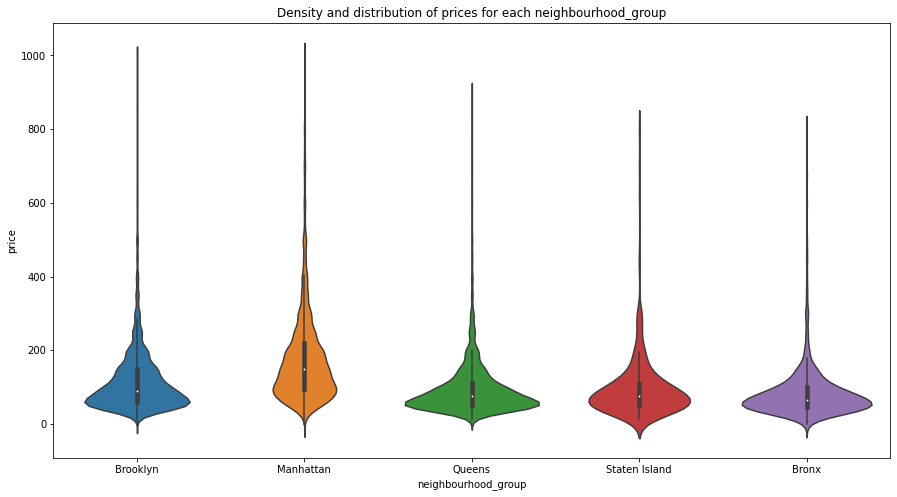

In [16]:
# Setting the size of the figure
plt.figure(figsize=(15,8))
# Setting the axis and title of the plot
visual_1=sns.violinplot(data=airbnb_df, x='neighbourhood_group', y='price')
visual_1.set_title('Density and distribution of prices for each neighbourhood_group')

In [17]:
# Getting the unique values of room_type
airbnb_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5, 1.0, 'Density and distribution of prices for each room_type')

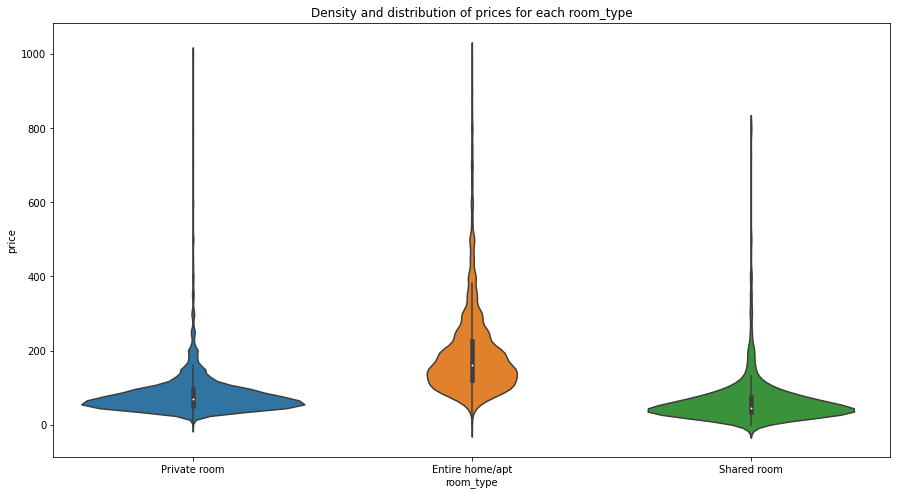

In [18]:
# Setting the size of the figure
plt.figure(figsize=(15,8))
# Setting the axis and title of the plot
visual_2=sns.violinplot(data=airbnb_df, x='room_type', y='price')
visual_2.set_title('Density and distribution of prices for each room_type')

### Relation between Neighbourhood Group, Room Type and Price


One can see the correlation of price, simultaneously, with room_type and neighbourhood_group.and understand the density.

Thanks to scatterplot, the relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. 
These parameters control what visual semantics are used to identify the different subsets.

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

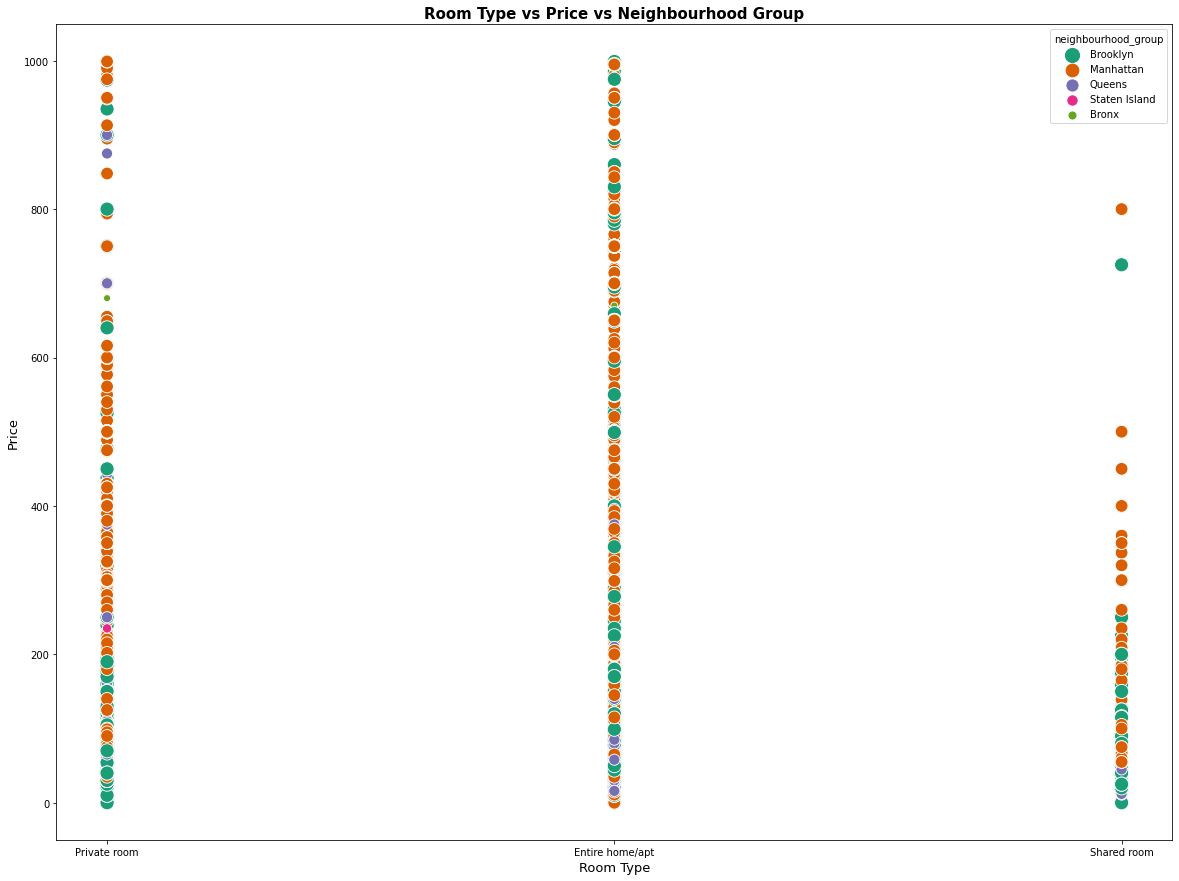

In [19]:
# Setting the size of the figure
plt.figure(figsize=(20,15))
# Setting the axis of the plot, keyword(hue) and size 
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=airbnb_df)
# Labelling the axis and setting the title
plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

### Map (using Latitude and Longitude) of Availabity or room related with Price


Next step is to see the availability related to the price.
To show this, one can use latitude and longitude coordinates.
By doing that, one can be able to visualize the availability of NYC in color coded range. 
However, it is important to remember that some extremely high values have dropped.

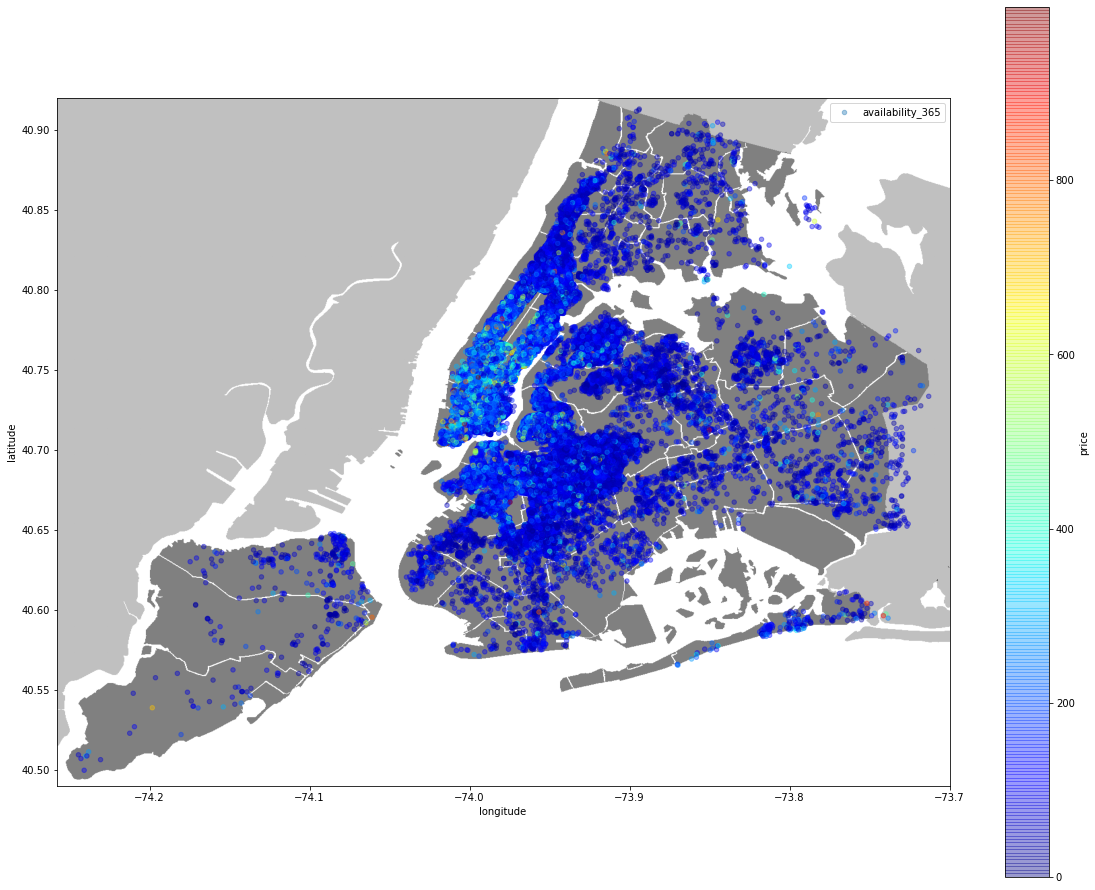

In [20]:
# Setting the figure size
plt.figure(figsize=(20,16))
# Loading the url of the png NYC image found on internet 
nyc_img=plt.imread('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
# Scaling the image based on the range of min and max of latitude and longitude for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

airbnb_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
# Adding the legend and then show the figure
plt.legend()
plt.show()


### Convertion of Price in log scale

In [21]:
# Converting the price in logarithm scale because it gives more useful scaled values for the prediction
airbnb_df['price_log'] = np.log(airbnb_df.price+1)

To see the distribution of the price on the log scale, distplot can be used.
This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions.

/home/sinan/ML and Data Science/hustle_ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

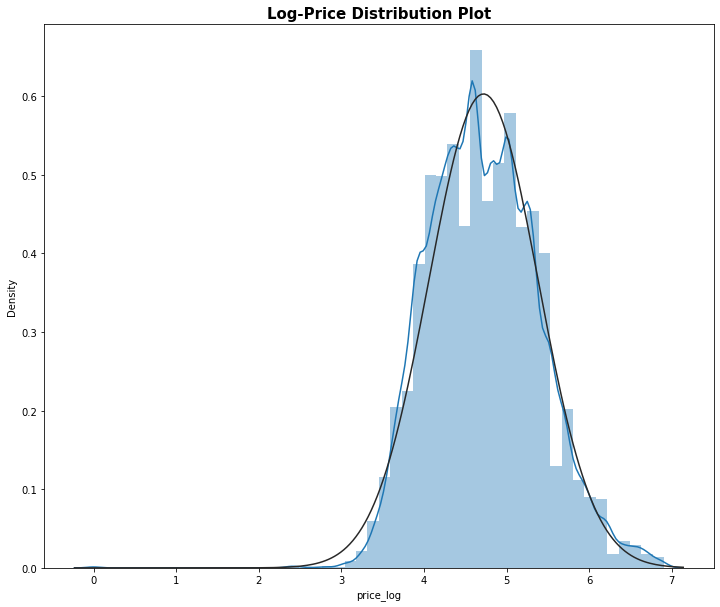

In [22]:
# Setting the size of the figure
plt.figure(figsize=(12,10))
sns.distplot(airbnb_df['price_log'], fit=norm)
# Setting the title
plt.title("Log-Price Distribution Plot",size=15, weight='bold')
# One can see the similarities to the Gaussian

In [23]:
# Dropping others features that is not necessary anymore
airbnb_df.drop(['host_id','price'], axis=1, inplace=True)

### Encoding Neighbourhood Group, Room Type and Neighbourhood


In this section, encoding the string values in neighbourhood_group, neighbourhood and room_type.
Machine learning algorithms and related with that prediction of price can be worked better with numbers. To provide only the numbers, encoding can be applied.
For each feature, printing the real values and the converted values after the encoding.

In [24]:
print('Before:')
print(airbnb_df['neighbourhood_group'][0:4])

airbnb_df['neighbourhood_group'] = airbnb_df['neighbourhood_group'].astype("category").cat.codes
print('\nAfter:')
print(airbnb_df['neighbourhood_group'][0:4])

Before:
0     Brooklyn
1    Manhattan
2    Manhattan
3     Brooklyn
Name: neighbourhood_group, dtype: object

After:
0    1
1    2
2    2
3    1
Name: neighbourhood_group, dtype: int8


In [25]:
print('Before:')
print(airbnb_df['neighbourhood'][0:4])

airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].astype("category").cat.codes
print('\nAfter:')
print(airbnb_df['neighbourhood'][0:4])

Before:
0      Kensington
1         Midtown
2          Harlem
3    Clinton Hill
Name: neighbourhood, dtype: object

After:
0    108
1    127
2     94
3     41
Name: neighbourhood, dtype: int16


In [26]:
print('Before:')
print(airbnb_df['room_type'][0:4])

airbnb_df['room_type'] = airbnb_df['room_type'].astype("category").cat.codes
print('\nAfter:')
print(airbnb_df['room_type'][0:4])

Before:
0       Private room
1    Entire home/apt
2       Private room
3    Entire home/apt
Name: room_type, dtype: object

After:
0    1
1    0
2    1
3    0
Name: room_type, dtype: int8


### Get correlation between different features (correlation matrix)

Now the correlation matrix is used to show that there is no strong relationship between price and other features. This indicates that no features need to be taken out of data. 

Text(0.5, 1.0, 'Correlation Matrix')

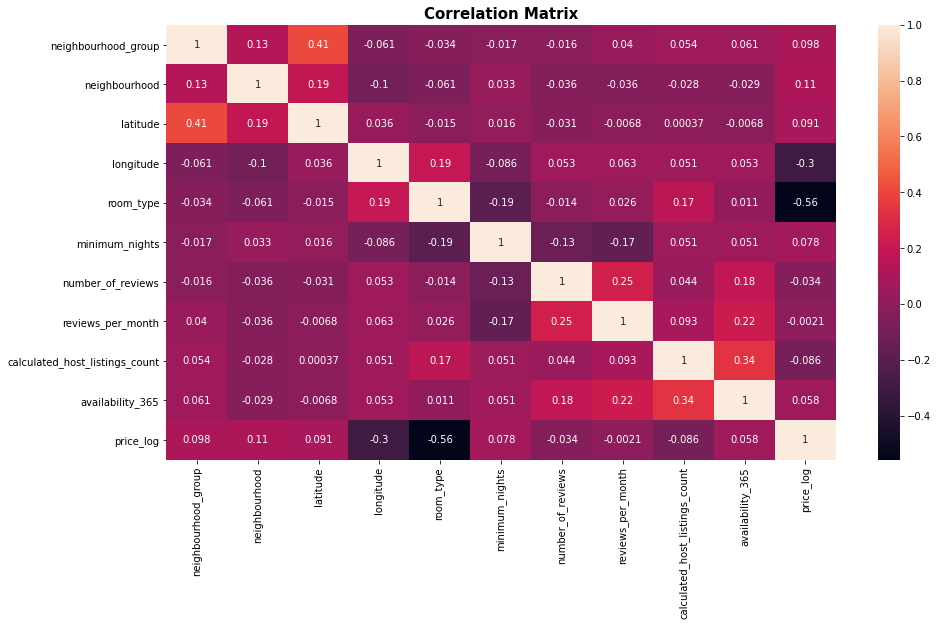

In [27]:
# Setting the size
plt.figure(figsize=(15,8))
# Using the heatmap to create the correlation matrix
sns.heatmap(airbnb_df.corr(method='kendall'), annot=True)
# Setting the title
plt.title("Correlation Matrix",size=15, weight='bold')

### Split of data set and save them in two different files (test and train set)

Splitting the data in train and test sets(the 80% of data in the train set and 20% in test set). Saving these in two different file to recall them later in the file Predicition_of_Price.ipynb. 

In [28]:
# Dataset splitting
train_split = 0.8
train_index = int(airbnb_df.shape[0] * train_split)

# Defining the two dataset using the train_index
train_set_DF = airbnb_df[:train_index]
test_set_DF = airbnb_df[train_index:]
print('train:\t', train_set_DF.shape)
print('test:\t', test_set_DF.shape)

# Saving train_set and test_set in two different csv file
train_set_DF.to_csv('./Data/train_set_preprocessed.csv',index=False)
test_set_DF.to_csv('./Data/test_set_preprocessed.csv', index=False)

train:	 (38482, 11)
test:	 (9621, 11)
